# Assignment 3

## Data Preparation

In [67]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

In [68]:
data_pelatihan = pd.read_excel('./dataset/Feedback_Lat_2020.xlsx')
data_elearn = pd.read_excel('./dataset/ELearn_2020.xlsx')
data_feedback_elearn= pd.read_excel('./dataset/Feedback_ELearn_2020.xlsx')
data_e = pd.read_excel('./dataset/ELearn_2020 - Copy.xlsx')

In [69]:
data_e.head()

,BULAN,USERNAME,CFU/FU,DIVISI,NAME,SURNAME,HCBP,COURSE,SCORE,TGL PRE TEST,PRE TEST,TGL POST TEST,POST TEST,STATUS,JOB FAMILY
0,1,120180321,CFU CONSUMER,DIV-TR7,NURFAINI ROFIFAH,-120180321,HCBP 1,9 Core Element of Marketing,90.00,2020-01-24,40,-,-,BELUM AKSES,EL - Commerce &amp; Relations
1,1,625140,CFU CONSUMER,DIV-TR2,SAMAD PANENGKE,-625140,HCBP 1,PT - 2 Project,94.73,2020-01-29,80,2020-01-31,100,LULUS,NaN
2,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,92.13,2020-01-27,70,2020-01-28,93.33,LULUS,NaN
3,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,92.20,2020-01-27,40,2020-01-28,100,LULUS,NaN
4,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,DigiERP,91.11,2020-01-28,80,2020-01-28,85,LULUS,NaN


In [70]:
data_e = data_e.rename(columns={'Month': 'Monthssss'})
data_e

,BULAN,USERNAME,CFU/FU,DIVISI,NAME,SURNAME,HCBP,COURSE,SCORE,TGL PRE TEST,PRE TEST,TGL POST TEST,POST TEST,STATUS,JOB FAMILY
0,1,120180321,CFU CONSUMER,DIV-TR7,NURFAINI ROFIFAH,-120180321,HCBP 1,9 Core Element of Marketing,90.00,2020-01-24,40,-,-,BELUM AKSES,EL - Commerce &amp; Relations
1,1,625140,CFU CONSUMER,DIV-TR2,SAMAD PANENGKE,-625140,HCBP 1,PT - 2 Project,94.73,2020-01-29,80,2020-01-31,100,LULUS,NaN
2,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,92.13,2020-01-27,70,2020-01-28,93.33,LULUS,NaN
3,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,92.20,2020-01-27,40,2020-01-28,100,LULUS,NaN
4,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,DigiERP,91.11,2020-01-28,80,2020-01-28,85,LULUS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289052,11,csr29872,T,T,STEVANO LACARUS BOLLY,csr29872,T,Consultative Selling New,96.79,2020-11-18,80,2020-11-18,90,LULUS,NaN
289053,11,890109,CEO OFFICE,DEP-INA,SAMUEL P. SIMANJUNTAK,890109,HCBP 5,AKHLAK & Telkom CODES,NaN,2020-11-19,90,2020-11-19,90,LULUS,NaN
289054,11,220046,CFU MOBILE,JVC-TSL,DINDA NOVITASARI,220046,HCBP 1,AKHLAK & Telkom CODES,NaN,2020-11-24,80,2020-11-24,90,LULUS,NaN
289055,11,905644,CFU ENTERPRISE,JVC-ADM,DAMIANUS DANNY,905644,HCBP 2,AKHLAK & Telkom CODES,NaN,2020-11-30,80,2020-11-30,80,LULUS,NaN


In [71]:
data_e['PRE TEST'].tail(10)
# .tail(30)

289047    100
289048     90
289049     50
289050     90
289051     90
289052     80
289053     90
289054     80
289055     80
289056     60
Name: PRE TEST, dtype: object

In [72]:
# cleansing feature status
data_e['STATUS'][data_e.STATUS != 'LULUS'] = data_e['STATUS'][data_e.STATUS != 'LULUS'] = 'TIDAK LULUS'
data_e['STATUS'].value_counts().head(100)

<ipython-input-72-7faf95f723cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e['STATUS'][data_e.STATUS != 'LULUS'] = data_e['STATUS'][data_e.STATUS != 'LULUS'] = 'TIDAK LULUS'


LULUS          250297
TIDAK LULUS     38760
Name: STATUS, dtype: int64

In [73]:
data_e.isna().sum()

BULAN                 0
USERNAME              0
CFU/FU              138
DIVISI              139
NAME                  3
SURNAME               0
HCBP                315
COURSE                0
SCORE             44565
TGL PRE TEST       4147
PRE TEST           4147
TGL POST TEST         0
POST TEST             0
STATUS                0
JOB FAMILY       181028
dtype: int64

In [74]:
# change all 'object' to numeric method 1
data_e['SCORE'] = pd.to_numeric(data_e['SCORE'], errors='coerce')
data_e['POST TEST'] = pd.to_numeric(data_e['POST TEST'], errors='coerce')

In [75]:
# df_data = pd.DataFrame
df_data = pd.DataFrame(data_e)
# df_data['POST TEST'] = pd.DataFrame(data_e['POST TEST'])
# df_data['STATUS'] = pd.DataFrame(feedback_elearning['STATUS'])

df_data.drop(['BULAN', 'USERNAME', 'CFU/FU', 'DIVISI', 'NAME', 'SURNAME', 'HCBP', 'COURSE', 'TGL PRE TEST','PRE TEST', 'TGL POST TEST', 'JOB FAMILY'], axis=1, inplace=True)
df_data.dropna(inplace=True)
df_data

,SCORE,POST TEST,STATUS
1,94.73,100.00,LULUS
2,92.13,93.33,LULUS
3,92.20,100.00,LULUS
4,91.11,85.00,LULUS
5,92.13,93.33,LULUS
...,...,...,...
289048,96.79,100.00,LULUS
289049,92.62,80.00,LULUS
289050,96.79,100.00,LULUS
289051,96.79,90.00,LULUS


In [76]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233174 entries, 1 to 289052
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SCORE      233174 non-null  float64
 1   POST TEST  233174 non-null  float64
 2   STATUS     233174 non-null  object 
dtypes: float64(2), object(1)
memory usage: 7.1+ MB


## Logistic Regression

In [77]:
# Prediksi lulus atau tidak lulus berdasarkan data score e-learning dan post test
# data_x = score e-learning dan post test
# data_y = status

In [78]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [79]:
list(df_data.columns)

['SCORE', 'POST TEST', 'STATUS']

In [80]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_data[['SCORE']+['POST TEST']], df_data[['STATUS']], test_size=0.2, random_state=0)

In [81]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((186539, 2), (46635, 2), (186539, 1), (46635, 1))

In [82]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [83]:
x_train.shape

(186539, 2)

In [84]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)

C:\Users\950351\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [85]:
model.classes_

array(['LULUS', 'TIDAK LULUS'], dtype=object)

In [86]:
x_test = scaler.transform(x_test)

In [87]:
model.predict_proba(x_train)

array([[1.00000000e+00, 3.47640618e-14],
       [1.00000000e+00, 2.72759730e-19],
       [2.19929275e-09, 9.99999998e-01],
       ...,
       [1.00000000e+00, 2.74319847e-19],
       [9.99988890e-01, 1.11096331e-05],
       [1.00000000e+00, 1.23969699e-11]])

In [88]:
y_pred = model.predict(x_test)
y_pred

array(['LULUS', 'LULUS', 'LULUS', ..., 'LULUS', 'LULUS', 'LULUS'],
      dtype=object)

In [89]:
# akurasi data train
model.score(x_train, y_train)

0.9998820621961091

In [90]:
# akurasi data test
metrics.accuracy_score(y_pred, y_test)

0.9998927843894071

In [91]:
confusion_matrix(y_test, y_pred)

array([[41626,     0],
       [    5,  5004]], dtype=int64)

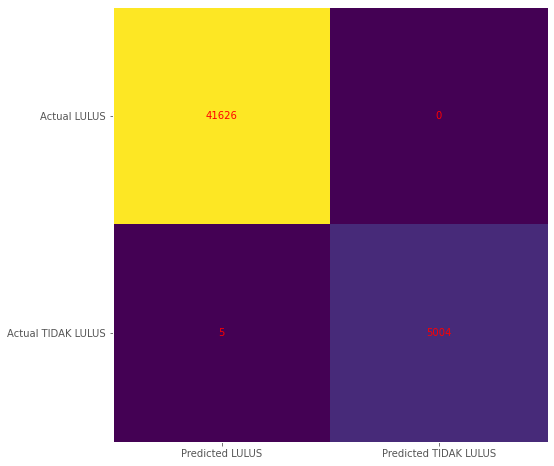

In [92]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted LULUS', 'Predicted TIDAK LULUS'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual LULUS', 'Actual TIDAK LULUS'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## K-Nearest Neighbour

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [94]:
(df_data[['SCORE']+['POST TEST']].shape, df_data[['STATUS']].shape)

((233174, 2), (233174, 1))

In [95]:
# Split data
# knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data['POST TEST'], df_data['STATUS'], test_size=0.2, random_state=0)
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data[['SCORE']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [96]:
(knn_x_train.shape, knn_x_test.shape, knn_y_train.shape, knn_y_test.shape)

((186539, 2), (46635, 2), (186539,), (46635,))

In [97]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(knn_x_train, knn_y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(knn_x_test)

In [98]:
# Akurasi Model
metrics.accuracy_score(y_pred_knn, knn_y_test)

0.9999785568778814

## Support Vector Machine

In [99]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [100]:
(df_data[['SCORE']+['POST TEST']].shape, df_data[['STATUS']].shape)

((233174, 2), (233174, 1))

In [101]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_data[['SCORE']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [102]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_svm, y_train_svm) 

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test_svm)

In [103]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Accuracy: 1.0


## Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [105]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df_data[['SCORE']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [106]:
# Create Decision Tree classifer object
dct = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = dct.fit(x_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred = dct.predict(x_test_dt)

In [107]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Random Forest

In [108]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(df_data[['SCORE']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [109]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train_rf, y_train_rf) 

y_pred_rfc=rfc.predict(x_test_rf)

In [110]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Random Forest:",metrics.accuracy_score(y_test_rf, y_pred_rfc))

Accuracy Random Forest: 1.0


## Naive Bayes

In [111]:
x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['SCORE']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [112]:
(x_train_nbc.shape, x_test_nbc.shape, y_train_nbc.shape, y_test_nbc.shape)

((186539, 2), (46635, 2), (186539,), (46635,))

In [113]:
from sklearn.naive_bayes import GaussianNB 
nbc=GaussianNB()
nbc.fit(x_train_nbc, y_train_nbc)
(x_train_nbc.shape, y_train_nbc.shape)
y_pred_nbc = nbc.predict(x_test_nbc)

In [114]:
print(x_train_nbc)

        SCORE  POST TEST
199271  92.62      90.00
213720  91.88     100.00
210744  92.13      46.67
73065   94.00     100.00
24367   93.67     100.00
...       ...        ...
204283  93.34      90.00
140383  89.29      80.00
200941  93.75     100.00
50478   89.29      73.33
232135  92.62      85.00

[186539 rows x 2 columns]


In [115]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test_nbc, y_pred_nbc))

Accuracy Naive Bayes: 0.9927307816018012


## Confusion Matrix

In [116]:
x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['SCORE']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
cm = confusion_matrix(y_test_nbc, y_pred_nbc)
cm

array([[41348,   278],
       [   61,  4948]], dtype=int64)

## Visualization

### Visualisasi Confusion Matrix Algoritma Naive Bayes

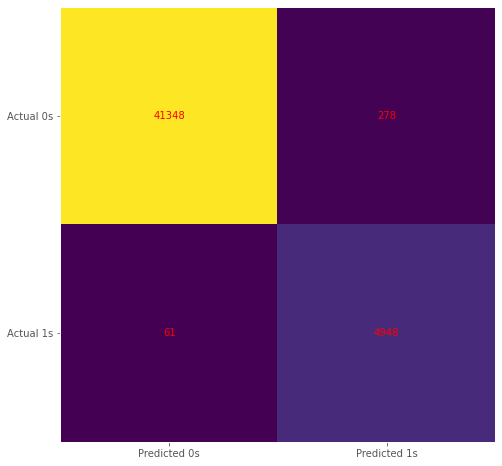

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Visualisasi Error Rate K dari algoritma KNN

Text(0, 0.5, 'Error mean')

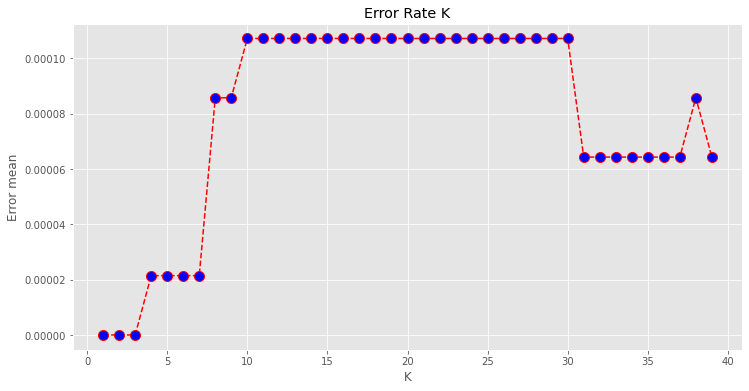

In [120]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knn_x_train, knn_y_train)
    pred_i = knn.predict(knn_x_test)
    error.append(np.mean(pred_i != knn_y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

### Visualisasi Feature Importance dari algoritma Random Forest

In [121]:
feature_importance = pd.Series(rfc.feature_importances_, index=x_train_rf.columns).sort_values(ascending=False)
feature_importance

POST TEST    0.99197
SCORE        0.00803
dtype: float64

No handles with labels found to put in legend.


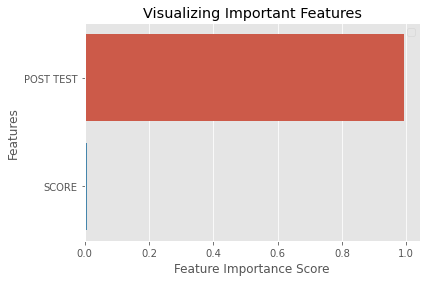

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()